In [20]:
# You might need to re rerun this cell, if you see killed  at end of outcome of this cell
!pip install --upgrade pip
!pip install pandas
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 26.0 MB/s eta 0:00:00


In [21]:
%matplotlib inline
from simcore_sdk import node_ports
import pandas as pd
import seaborn as sns
import numpy as np
from pylab import *


In [40]:
rcParams["figure.figsize"] = 15,15

In [7]:
PORTS = await node_ports.ports()
input_1 = await (await PORTS.inputs)[0].get()
input_2 = await (await PORTS.inputs)[1].get()

downloading /tmp/simcorefiles/outFile/DATASET1.csv [837044 bytes]: 100%|██████████| 837k/837k [00:00<00:00, 73.5Mbyte/s]
downloading /tmp/simcorefiles/outFile/DATASET2.csv [751838 bytes]: 100%|██████████| 752k/752k [00:00<00:00, 138Mbyte/s]


In [12]:
pvalue = 0.05
logFC = 0
data1 = pd.read_csv(input_1)
data1["expression"] = "Not differentially expressed"
data1.loc[((data1["P.Value"]<pvalue) &(data1["Log FC"]>logFC)), "expression"]= "Down regulated"
data1.loc[((data1["P.Value"]<pvalue) &(data1["Log FC"]< -1*logFC)), "expression"]= "Up regulated"
data1 = data1.rename(columns={"P.Value":"data1_P.Value","Log FC":"data1_Log FC","expression":"data1_expression"})



data2 = pd.read_csv(input_2)
data2["expression"] = "Not differentially expressed"
data2.loc[((data2["P.Value"]<pvalue) &(data2["Log FC"]>logFC)), "expression"]= "Down regulated"
data2.loc[((data2["P.Value"]<pvalue) &(data2["Log FC"]< -1*logFC)), "expression"]= "Up regulated"
data2 = data2.rename(columns={"P.Value":"data2_P.Value","Log FC":"data2_Log FC","expression":"data2_expression"})

In [14]:
merged_data = data1.merge(data2, on="Gene")
merged_data.to_csv("Merged.csv", index=False)

In [18]:
compare = merged_data.groupby(["data1_expression", "data2_expression"]).size().reset_index().pivot_table(index="data1_expression", columns="data2_expression", values=0),

In [32]:
compare[0]

data2_expression,Down regulated,Not differentially expressed,Up regulated
data1_expression,,,
Down regulated,834,1048,82
Not differentially expressed,6850,35307,5292
Up regulated,47,792,415


<AxesSubplot:xlabel='data2_expression', ylabel='data1_expression'>

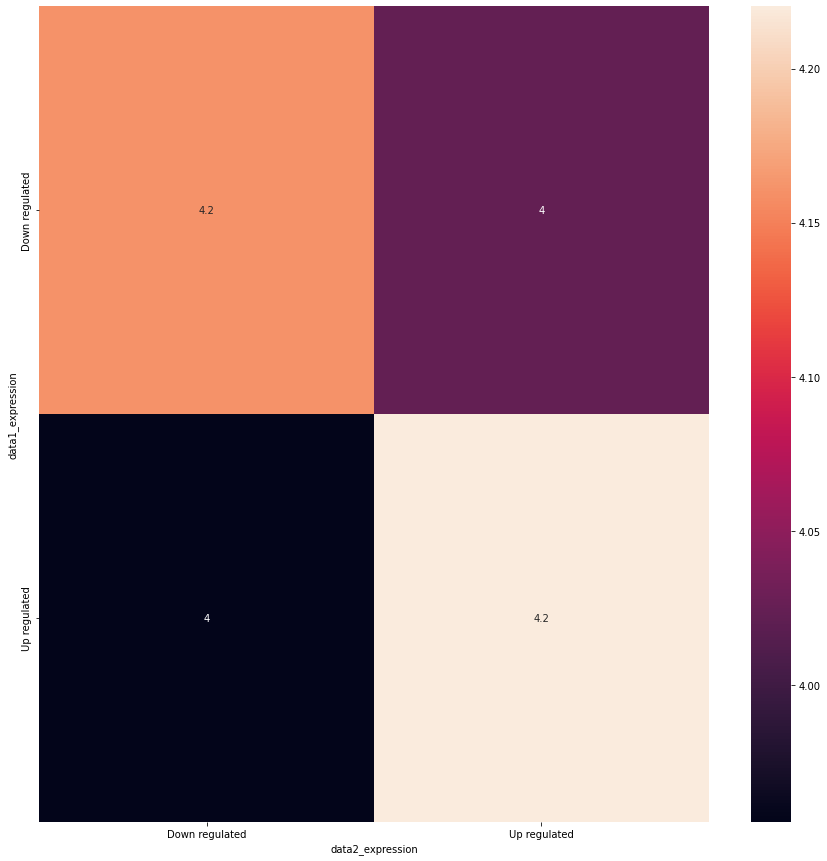

In [42]:
sns.heatmap(compare[0].applymap(np.log10), annot=True)

In [35]:
pvalue = 0.05
logFC = 0
data1 = pd.read_csv(input_1)
data1.loc[(data1["Log FC"]>logFC), "expression"]= "Down regulated"
data1.loc[(data1["Log FC"]< -1*logFC), "expression"]= "Up regulated"
data1 = data1.rename(columns={"P.Value":"data1_P.Value","Log FC":"data1_Log FC","expression":"data1_expression"})



data2 = pd.read_csv(input_2)
data2.loc[(data2["Log FC"]>logFC), "expression"]= "Down regulated"
data2.loc[(data2["Log FC"]< -1*logFC), "expression"]= "Up regulated"
data2 = data2.rename(columns={"P.Value":"data2_P.Value","Log FC":"data2_Log FC","expression":"data2_expression"})

In [36]:
merged_data = data1.merge(data2, on="Gene")
# merged_data.to_csv("Merged.csv", index=False)
compare = merged_data.groupby(["data1_expression", "data2_expression"]).size().reset_index().pivot_table(index="data1_expression", columns="data2_expression", values=0),

<AxesSubplot:xlabel='data2_expression', ylabel='data1_expression'>

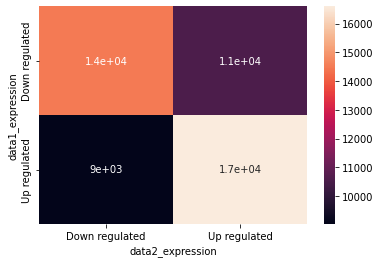

In [39]:
sns.heatmap(compare[0], annot=True)